In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
  
import torch
import torch.nn as nn
import numpy as np
from copy import deepcopy

def lorenz(x, t, F):
    '''Partial derivatives for Lorenz-96 ODE.'''
    p = len(x)
    dxdt = np.zeros(p)
    for i in range(p):
        dxdt[i] = (x[(i+1) % p] - x[(i-2) % p]) * x[(i-1) % p] - x[i] + F

    return dxdt

def simulate_lorenz_96(p, T, F=10.0, delta_t=0.1, sd=0.1, burn_in=1000,
                       seed=0):
    if seed is not None:
        np.random.seed(seed)

    # Use scipy to solve ODE.
    x0 = np.random.normal(scale=0.01, size=p)
    t = np.linspace(0, (T + burn_in) * delta_t, T + burn_in)
    X = odeint(lorenz, x0, t, args=(F,))
    X += np.random.normal(scale=sd, size=(T + burn_in, p))

    # Set up Granger causality ground truth.
    GC = np.zeros((p, p), dtype=int)
    for i in range(p):
        GC[i, i] = 1
        GC[i, (i + 1) % p] = 1
        GC[i, (i - 1) % p] = 1
        GC[i, (i - 2) % p] = 1

    return X[burn_in:], GC

In [5]:
import pandas as pd
device = torch.device('cuda')
X_np, GC = simulate_lorenz_96(p=10, F=10, T=1000)
data_df = pd.DataFrame(X_np)

In [6]:
data_df.to_csv('simulate_lorenz_96.csv',index = False)

In [7]:
data_df.to_csv('data/data_df.csv',index= False)

Arguments: Namespace(cuda=True, data=['data/data_df.csv'], dilation_coefficient=10, epochs=100, ground_truth=None, hidden_layers=2, kernel_size=10, learning_rate=0.01, log_interval=50, optimizer='Adam', plot=True, seed=1111, significance=0.99)

 Dataset:  data_df.csv

 Analysis started for target:  0
Epoch:  1 [1%] 	Loss: 24.255033
Epoch: 50 [50%] 	Loss: 9.745614
Epoch: 100 [100%] 	Loss: 3.278476
Potential causes:  [6, 0, 7, 2, 1]
6 : 3.527813196182251
0 : 12.478721618652344
7 : 3.6605098247528076
2 : 4.116296291351318
1 : 4.124187469482422
Validated causes:  [6, 0, 7, 2, 1]

 Analysis started for target:  1
Epoch:  1 [1%] 	Loss: 27.718542
Epoch: 50 [50%] 	Loss: 7.643240
Epoch: 100 [100%] 	Loss: 2.426323
Potential causes:  [1, 0, 2, 9]
1 : 21.00961685180664
0 : 4.459470748901367
2 : 2.8489835262298584
9 : 3.8223752975463867
Validated causes:  [1, 0, 2, 9]

 Analysis started for target:  2
Epoch:  1 [1%] 	Loss: 25.649200
Epoch: 50 [50%] 	Loss: 6.846662
Epoch: 100 [100%] 	Loss: 2.723236


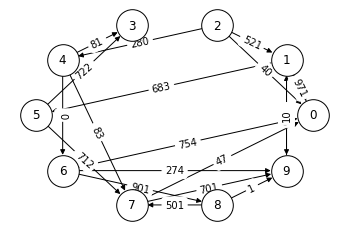

<Figure size 432x288 with 0 Axes>

In [12]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data data/data_df.csv  --cuda --significance 0.99 --hidden_layers 2 --kernel_size 10 --log_interval 50 --epochs 100 --dilation_coefficient 10 --plot

In [13]:
read_dictionary = np.load('my_file.npy',allow_pickle='TRUE').item()

In [14]:
GC_set = np.zeros((10,10))
for i in list(read_dictionary.keys()):
    index1 = i
    for j in read_dictionary[i]:
        index2 = j
        GC_set[i][j] = 1

True variable usage = 40.00%
Estimated variable usage = 29.00%
Accuracy = 73.00%


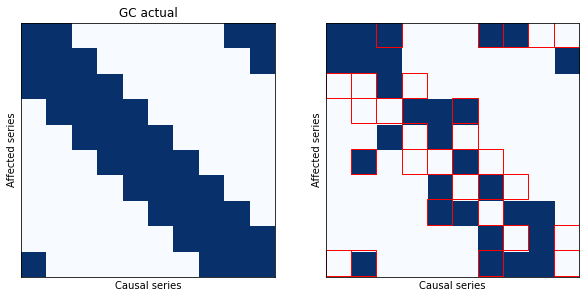

In [15]:
print('True variable usage = %.2f%%' % (100 * np.mean(GC)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_set)))
print('Accuracy = %.2f%%' % (100 * np.mean(GC == GC_set)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(GC, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(GC_set, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_set), len(GC_set), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(len(GC_set)):
    for j in range(len(GC_set)):
        if GC[i, j] != GC_set[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()

In [16]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data data/demo_dataset.csv --cuda 

Arguments: Namespace(cuda=True, data=['data/demo_dataset.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.8)

 Dataset:  demo_dataset.csv

 Analysis started for target:  Timeser0
Epoch:  1 [0%] 	Loss: 2.315027
Epoch: 500 [50%] 	Loss: 1.695503
Epoch: 1000 [100%] 	Loss: 1.694705
Potential causes:  [1]
1 : 1.7019717693328857
Validated causes:  []

 Analysis started for target:  Timeser1
Epoch:  1 [0%] 	Loss: 4.291189
Epoch: 500 [50%] 	Loss: 0.002134
Epoch: 1000 [100%] 	Loss: 0.002114
Potential causes:  [0]
0 : 6.359326362609863
Validated causes:  [0]

 Analysis started for target:  Timeser2
Epoch:  1 [0%] 	Loss: 1.740447
Epoch: 500 [50%] 	Loss: 0.364763
Epoch: 1000 [100%] 	Loss: 0.364258
Potential causes:  [1, 0]
1 : 1.6306953430175781
0 : 0.4089888036251068
Validated causes:  [1]

 Analysis started for target:  Timeser3 
Epoch:  1 [0%] 	Loss: 2.26408

<Figure size 432x288 with 0 Axes>

In [17]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data data/cyto_full_data.csv --cuda 

Arguments: Namespace(cuda=True, data=['data/cyto_full_data.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.8)

 Dataset:  cyto_full_data.csv

 Analysis started for target:  praf
Epoch:  1 [0%] 	Loss: 76976.914062
Epoch: 500 [50%] 	Loss: 1074.116943
Epoch: 1000 [100%] 	Loss: 1017.266724
Potential causes:  [1]
1 : 128273.5859375
Validated causes:  [1]

 Analysis started for target:  pmek
Epoch:  1 [0%] 	Loss: 163681.984375
Epoch: 500 [50%] 	Loss: 2299.747070
Epoch: 1000 [100%] 	Loss: 2129.098877
Potential causes:  [0, 1]
0 : 257283.921875
1 : 5499.8701171875
Validated causes:  [0, 1]

 Analysis started for target:  plcg
Epoch:  1 [0%] 	Loss: 33404.703125
Epoch: 500 [50%] 	Loss: 3516.685059
Epoch: 1000 [100%] 	Loss: 2258.029053
Potential causes:  [10, 6, 2]
10 : 2345.7353515625
6 : 2364.52392578125
2 : 3101.744140625
Validated causes:  [2]

 Analysis